# Basic Classification Using Tensorflow Tutorial

## Overview
* Today, We will train our first neural network using Tutorial
https://www.tensorflow.org/tutorials/keras/basic_classification

## Load Dataset

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
Y = train['label']
X = train.drop(labels=["label"], axis=1)

### Preprocess the data

In [4]:
X = X / 255.0
test = test / 255.0

In [5]:
from sklearn.model_selection import train_test_split
random_seed=0
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=random_seed)

## Visualization

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras

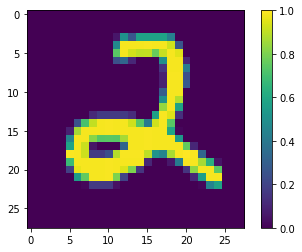

In [7]:
plt.figure()
Xshow = X_train.values.reshape(-1,28,28,1)
plt.imshow(Xshow[0][:,:,0])
plt.colorbar()
plt.grid(False)

In [8]:
X_train.shape

(37800, 784)

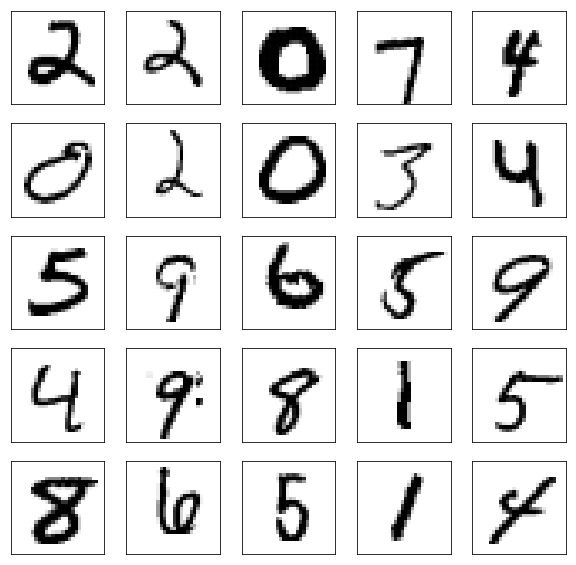

In [9]:
plt.figure(figsize=(10,10))
class_names = ['0','1','2','3','4','5','6','7','8','9']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xshow[i][:,:,0], cmap=plt.cm.binary)

## Bulid the model

### Setup the layers

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
X_val = X_val.values.reshape(-1,28,28)
X_train = X_train.values.reshape(-1,28,28)
test = test.values.reshape(-1,28,28)

### Train the model

In [13]:
model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
37800/37800 [==============================] - 4s 118us/step - loss: 0.3056 - acc: 0.9135
Epoch 2/5
37800/37800 [==============================] - 4s 107us/step - loss: 0.1389 - acc: 0.9598
Epoch 3/5
37800/37800 [==============================] - 4s 113us/step - loss: 0.0945 - acc: 0.9725
Epoch 4/5
37800/37800 [==============================] - 5s 133us/step - loss: 0.0711 - acc: 0.9784
Epoch 5/5
37800/37800 [==============================] - 6s 149us/step - loss: 0.0539 - acc: 0.9838


### Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print("Test Accuracy: {}".format(test_acc))

4200/4200 [==============================] - 0s 54us/step
Test Accuracy: 0.9711904761904762


### Train all of Train dataset

In [15]:
X = X.values.reshape(-1,28,28)

In [16]:
model.fit(X,Y, epochs=5)

Epoch 1/5
42000/42000 [==============================] - 6s 144us/step - loss: 0.0494 - acc: 0.9854
Epoch 2/5
42000/42000 [==============================] - 6s 143us/step - loss: 0.0370 - acc: 0.9890
Epoch 3/5
42000/42000 [==============================] - 6s 151us/step - loss: 0.0290 - acc: 0.9913
Epoch 4/5
42000/42000 [==============================] - 8s 181us/step - loss: 0.0239 - acc: 0.9932
Epoch 5/5
42000/42000 [==============================] - 7s 171us/step - loss: 0.0192 - acc: 0.9937


## Submission

In [17]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

In [18]:
submission = pd.read_csv('../input/sample_submission.csv')
submission["Label"] = predictions

In [19]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [20]:
submission.to_csv('./simpleMNIST.csv', index=False)